Created by: Akram Moustafa
Date: 09/02/2025

Description: 
This project implements machine learning models for Human Activity Recognition (HAR)
using IMU sensor data. The goal of the machine learning model is to predict gestures before they occur by analyzing IMU sensor data.

Dataset obtained from: Reyes-Ortiz, J., Anguita, D., Ghio, A., Oneto, L., & Parra, X. (2013). Human Activity Recognition Using Smartphones [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C54S4K.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Folder
DATASET_PATH = ".//"

# Train folder
X_train = np.loadtxt(DATASET_PATH + "train/X_train.txt")
y_train = np.loadtxt(DATASET_PATH + "train/y_train.txt").astype(int)

# Train folder
X_test = np.loadtxt(DATASET_PATH + "test/X_test.txt")
y_test = np.loadtxt(DATASET_PATH + "test/y_test.txt").astype(int)

print("X_train shape:", X_train.shape)  # (7352, 561)
print("y_train shape:", y_train.shape)  # (7352,)
print("X_test shape:", X_test.shape)    # (2947, 561)
print("y_test shape:", y_test.shape)    # (2947,)

X_train shape: (7352, 561)
y_train shape: (7352,)
X_test shape: (2947, 561)
y_test shape: (2947,)


In [10]:
import numpy as np

file_path = "./train/Inertial Signals/body_acc_x_train.txt"
data = np.loadtxt(file_path)

print("Dataset shape is ", data.shape) 

Dataset shape is  (7352, 128)


In [11]:
acc_x = np.loadtxt("./train/Inertial Signals/body_acc_x_train.txt")
acc_y = np.loadtxt("./train/Inertial Signals/body_acc_y_train.txt")
acc_z = np.loadtxt("./train/Inertial Signals/body_acc_z_train.txt")

gyro_x = np.loadtxt("./train/Inertial Signals/body_gyro_x_train.txt")
gyro_y = np.loadtxt("./train/Inertial Signals/body_gyro_y_train.txt")
gyro_z = np.loadtxt("./train/Inertial Signals/body_gyro_z_train.txt")

y_train = np.loadtxt("./train/y_train.txt").astype(int)


In [12]:
idx = 0
activity_id = y_train[idx]

print("Gesture/Activity ID:", activity_id)

Gesture/Activity ID: 5


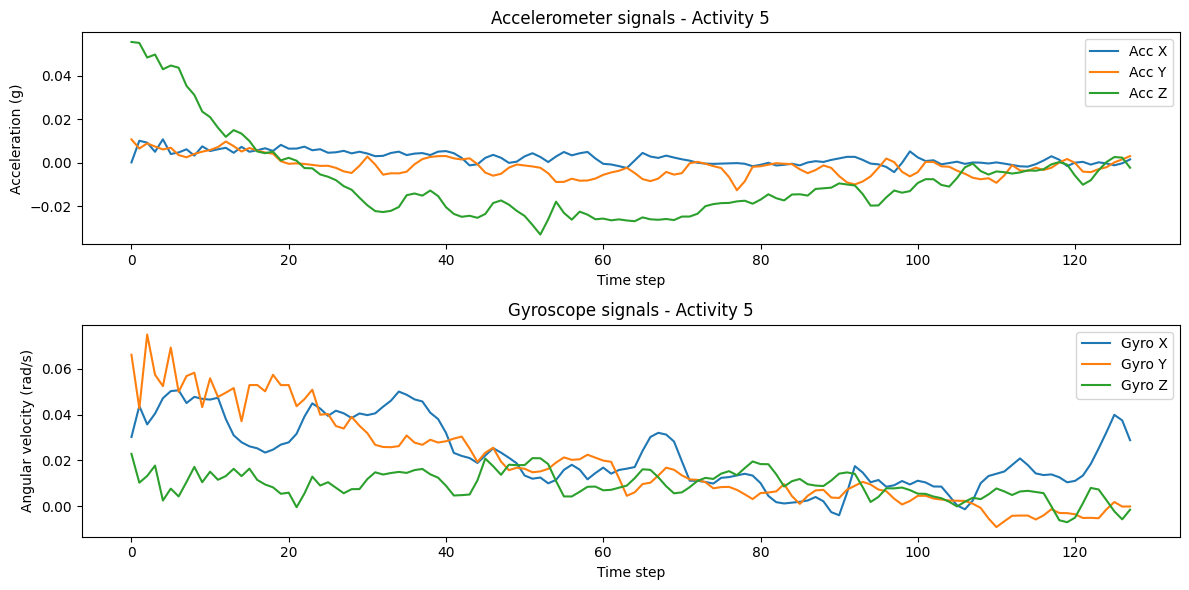

In [ ]:

# We plot two sensor readings one for gyroscope and one for acc
timesteps = np.arange(acc_x.shape[1])  # 128 timesteps

plt.figure(figsize=(12, 6))

# accelerometer data
plt.subplot(2, 1, 1)
plt.plot(timesteps, acc_x[idx], label="Acc X")
plt.plot(timesteps, acc_y[idx], label="Acc Y")
plt.plot(timesteps, acc_z[idx], label="Acc Z")
plt.title(f"Accelerometer signals - Activity {activity_id}")
plt.xlabel("Time step")
plt.ylabel("Acceleration (g)")
plt.legend()

# gyroscope data
plt.subplot(2, 1, 2)
plt.plot(timesteps, gyro_x[idx], label="Gyro X")
plt.plot(timesteps, gyro_y[idx], label="Gyro Y")
plt.plot(timesteps, gyro_z[idx], label="Gyro Z")
plt.title(f"Gyroscope signals - Activity {activity_id}")
plt.xlabel("Time step")
plt.ylabel("Angular velocity (rad/s)")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import os

# Paths
DATA_PATH = r"C:\Users\ammou\OneDrive\Desktop\IMUResearch\UCI HAR Dataset\train\Inertial Signals"
LABEL_PATH = r"C:\Users\ammou\OneDrive\Desktop\IMUResearch\UCI HAR Dataset\train/y_train.txt"

def load_signals(data_path):
    signal_files = [
        "body_acc_x_train.txt", "body_acc_y_train.txt", "body_acc_z_train.txt",
        "body_gyro_x_train.txt", "body_gyro_y_train.txt", "body_gyro_z_train.txt",
        "total_acc_x_train.txt", "total_acc_y_train.txt", "total_acc_z_train.txt"
    ]
    
    signals = []
    for filename in signal_files:
        filepath = os.path.join(data_path, filename)
        data = np.loadtxt(filepath)   # shape: (N, 128)
        signals.append(data[..., np.newaxis])  # add channel axis

    return np.concatenate(signals, axis=-1)

X_train = load_signals(DATA_PATH)
y_train = np.loadtxt(LABEL_PATH).astype(int) - 1  

print("X_train:", X_train.shape)  # (7352, 128, 9)
print("y_train:", y_train.shape)  # (7352,)


X_train: (7352, 128, 9)
y_train: (7352,)


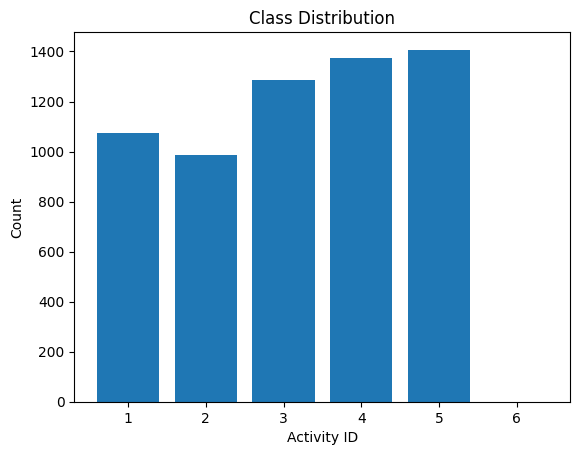

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(y_train, bins=np.arange(1, 8)-0.5, rwidth=0.8)
plt.xticks(range(1, 7))
plt.xlabel("Activity ID")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


In [25]:
import pandas as pd

df_stats = pd.DataFrame({
    "mean_acc_x": acc_x.mean(axis=1),
    "std_acc_x": acc_x.std(axis=1),
    "mean_gyro_x": gyro_x.mean(axis=1),
    "std_gyro_x": gyro_x.std(axis=1),
    "label": y_train
})

print(df_stats.groupby("label").mean())

       mean_acc_x  std_acc_x  mean_gyro_x  std_gyro_x
label                                                
0       -0.000271   0.223864    -0.003691    0.468969
1       -0.003224   0.253498     0.050122    0.468834
2        0.002183   0.370303    -0.050523    0.594175
3       -0.000850   0.006769    -0.010474    0.017945
4        0.000354   0.006155     0.001394    0.044211
5       -0.001728   0.014528     0.011256    0.031755


In [ ]:
import numpy as np
import os

DATA_PATH = r"C:\Users\ammou\OneDrive\Desktop\IMUResearch\UCI HAR Dataset\train\Inertial Signals"
LABEL_PATH = r"C:\Users\ammou\OneDrive\Desktop\IMUResearch\UCI HAR Dataset\train/y_train.txt"

signal_files = [
    "body_acc_x_train.txt", "body_acc_y_train.txt", "body_acc_z_train.txt",
    "body_gyro_x_train.txt", "body_gyro_y_train.txt", "body_gyro_z_train.txt",
    "total_acc_x_train.txt", "total_acc_y_train.txt", "total_acc_z_train.txt"
]

# Load &
signals = []
for filename in signal_files:
    data = np.loadtxt(os.path.join(DATA_PATH, filename))
    signals.append(data[..., np.newaxis]) 

X = np.concatenate(signals, axis=-1)   
y = np.loadtxt(LABEL_PATH).astype(int) - 1 

print("X shape:", X.shape)
print("y shape:", y.shape)

np.savez("UCIHAR_train_seq.npz", X=X, y=y)

X shape: (7352, 128, 9)
y shape: (7352,)


In [ ]:
# seq2seq_imu.py
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


class IMUSeq2SeqDataset(Dataset):
    """
    For each window X (128, 9):
      - input  = X[:T_in]    
      - target = X[1:T_in+1]
    """
    def __init__(self, X, t_in=127, device="cpu", mean_std=None):
        if mean_std is None:
        else:
    def __len__(self):
    def __getitem__(self, idx):

class Encoder(nn.Module):
    def __init__(self, in_dim=9, hidden=128, num_layers=1, dropout=0.0):
    def forward(self, x):

class Decoder(nn.Module):
    def __init__(self, out_dim=9, hidden=128, num_layers=1):
    def forward(self):

class Seq2Seq(nn.Module):
    """
    Teacher forcing during training:
      input: X_in  (B, T, C)
      target: Y_out(B, T, C)
    Prediction: next time step
    """
    def __init__(self, encoder, decoder, teacher_forcing=0.5):
    def forward(self, X_in, Y_out=None):

if __name__ == "__main__":

    data = np.load("UCIHAR_train_seq.npz")
    X = data["X"]      

  